# Applied Problem 1

In [ ]:
def compile_and_train(model, x_train, y_train, x_val, y_val):
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val), batch_size=32)
    return history

## Importing Libraries

In [ ]:
import random
import numpy as np
import seaborn as sns
import tensorflow as tf

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dense, Flatten, LeakyReLU, MaxPooling2D
from tensorflow.keras.models import Sequential

## Data Handling

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

In [ ]:
# Load the Fashion MNIST dataset
(x_train_full, y_train_full), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Normalize the data
x_train_full = x_train_full / 255.0
x_test = x_test / 255.0

In [ ]:
# Split the training set into separate training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

## One-Layer Model

In [ ]:
def build_model(activation_function, num_neurons):
    if activation_function == 'leaky_relu':
        model = Sequential([
            Flatten(input_shape=(28, 28)),  # Flatten the input
            Dense(num_neurons),  # Hidden layer with 'p' neurons
            LeakyReLU(alpha=0.01),  # LeakyReLU with a small slope
            Dense(10, activation='softmax')  # Output layer for 10 classes
        ])
    else:
        model = Sequential([
            Flatten(input_shape=(28, 28)),  # Flatten the input
            Dense(num_neurons, activation=activation_function),  # Hidden layer with 'p' neurons
            Dense(10, activation='softmax')  # Output layer for 10 classes
        ])
    return model


### Validation Loop

In [ ]:
neuron_choices = [64, 128, 256]

best_leaky_model = None
best_leaky_accuracy = 0
best_model = None
best_accuracy = 0

for num_neurons in neuron_choices:
    model = build_model('relu', num_neurons)
    leaky_model = build_model('leaky_relu', num_neurons)

    history = compile_and_train(model, x_train, y_train, x_val, y_val)
    leaky_history = compile_and_train(leaky_model, x_train, y_train, x_val, y_val)

    if max(history.history['val_accuracy']) > best_accuracy:
        best_accuracy = max(history.history['val_accuracy'])
        best_model = model

    if max(leaky_history.history['val_accuracy']) > best_leaky_accuracy:
        best_leaky_accuracy = max(leaky_history.history['val_accuracy'])
        best_leaky_model = leaky_model

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5363 - accuracy: 0.8134 - val_loss: 0.4400 - val_accuracy: 0.8417
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4049 - accuracy: 0.8566 - val_loss: 0.3905 - val_accuracy: 0.8600
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3684 - accuracy: 0.8672 - val_loss: 0.3810 - val_accuracy: 0.8659
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3449 - accuracy: 0.8761 - val_loss: 0.3568 - val_accuracy: 0.8740
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3250 - accuracy: 0.8817 - val_loss: 0.3619 - val_accuracy: 0.8708
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3095 - accuracy: 0.8866 - val_loss: 0.3385 - val_accuracy: 0.8800
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2970 - accuracy: 0.8916 - val_loss: 0.3337 - val_accuracy:

### Evaluate Models on Testing Data

In [ ]:
# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f"ReLU Test Loss: {test_loss}, ReLU Test Accuracy: {test_accuracy}")

leaky_test_loss, leaky_test_accuracy = best_leaky_model.evaluate(x_test, y_test)
print(f"Leaky ReLU Test Loss: {leaky_test_loss}, Leaky ReLU Test Accuracy: {leaky_test_accuracy}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3648 - accuracy: 0.8772
ReLU Test Loss: 0.3648383915424347, ReLU Test Accuracy: 0.8772000074386597
313/313 [==============================] - 1s 2ms/step - loss: 0.3643 - accuracy: 0.8738
Leaky ReLU Test Loss: 0.36434975266456604, Leaky ReLU Test Accuracy: 0.8737999796867371


### Compare with Different Activation Function

In [ ]:
neuron_choices = [64, 128, 256]

best_tanh_model = None
best_tanh_accuracy = 0

for num_neurons in neuron_choices:
    tanh_model = build_model('tanh', num_neurons)

    tanh_history = compile_and_train(tanh_model, x_train, y_train, x_val, y_val)

    if max(tanh_history.history['val_accuracy']) > best_tanh_accuracy:
        best_tanh_accuracy = max(tanh_history.history['val_accuracy'])
        best_tanh_model = tanh_model

tanh_test_loss, tanh_test_accuracy = best_tanh_model.evaluate(x_test, y_test)
print(f"TanH Test Loss: {tanh_test_loss}, TanH Test Accuracy: {tanh_test_accuracy}")

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5122 - accuracy: 0.8203 - val_loss: 0.4160 - val_accuracy: 0.8463
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3855 - accuracy: 0.8605 - val_loss: 0.3750 - val_accuracy: 0.8636
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3520 - accuracy: 0.8715 - val_loss: 0.3690 - val_accuracy: 0.8655
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3302 - accuracy: 0.8799 - val_loss: 0.3505 - val_accuracy: 0.8738
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3103 - accuracy: 0.8859 - val_loss: 0.3568 - val_accuracy: 0.8684
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2955 - accuracy: 0.8921 - val_loss: 0.3243 - val_accuracy: 0.8835
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2847 - accuracy: 0.8953 - val_loss: 0.3219 - val_accuracy:

### Multiple options for `p` neurons

In [ ]:
results = []
# neuron_counts = [32, 64, 128, 256, 512, 1024, 2048]

for neurons in [32, 64, 128, 256, 512, 1024, 2048]:
    history = compile_and_train(
        build_model('tanh', neurons),
        x_train,
        y_train,
        x_val,
        y_val
    )
    results.append(
        (neurons, max(history.history['val_accuracy']), min(history.history['val_loss']))
    )

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5490 - accuracy: 0.8122 - val_loss: 0.4314 - val_accuracy: 0.8442
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4025 - accuracy: 0.8563 - val_loss: 0.3930 - val_accuracy: 0.8585
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3708 - accuracy: 0.8661 - val_loss: 0.3863 - val_accuracy: 0.8586
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3510 - accuracy: 0.8726 - val_loss: 0.3596 - val_accuracy: 0.8714
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3331 - accuracy: 0.8788 - val_loss: 0.3536 - val_accuracy: 0.8707
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3212 - accuracy: 0.8825 - val_loss: 0.3423 - val_accuracy: 0.8746
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3107 - accuracy: 0.8866 - val_loss: 0.3441 - val_accuracy:

### Performances of `p` neurons' options

In [ ]:
neurons, accuracies, losses = zip(*sorted(results))

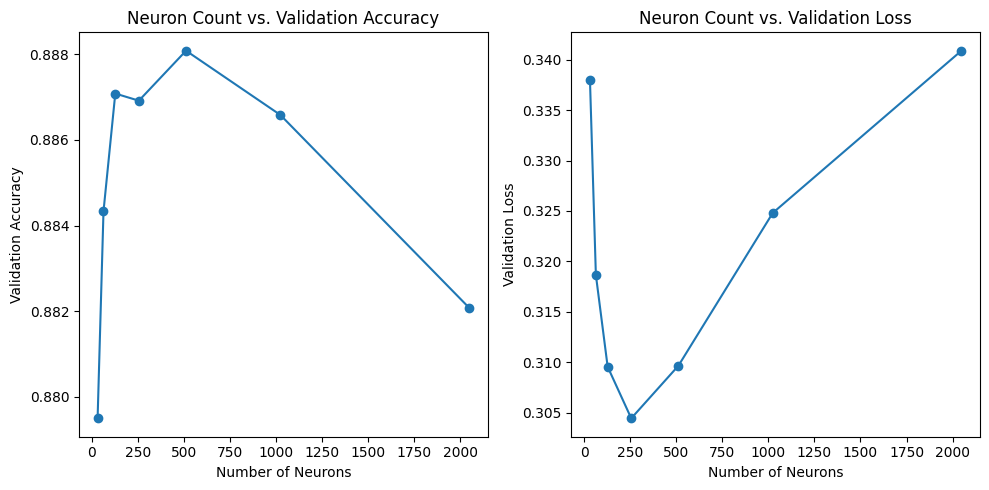

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(neurons, accuracies, marker='o')
plt.title("Neuron Count vs. Validation Accuracy")
plt.xlabel("Number of Neurons")
plt.ylabel("Validation Accuracy")
# plt.ylim(0.8, 1)

plt.subplot(1, 2, 2)
plt.plot(neurons, losses, marker='o')
plt.title("Neuron Count vs. Validation Loss")
plt.xlabel("Number of Neurons")
plt.ylabel("Validation Loss")

plt.tight_layout()
plt.show()

In [ ]:
# Sorting results to find the best one
# According to validation accuracy
results.sort(key=lambda x: x[1], reverse=True)
print(f"Best neuron count: {results[0][0]} with Validation Accuracy: {results[0][1]}")

Best neuron count: 512 with Validation Accuracy: 0.8880833387374878


## Multi-Layer Perceptron (MLP)
Two-Layer-Dense Model

In [ ]:
def build_two_layer_model(size_layer1, size_layer2):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(size_layer1, activation='relu'),
        Dense(size_layer2, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [ ]:
mlp_layer_sizes = [32, 64, 128, 256, 512]
best_mlp_config = (0, 0)
best_mlp_accuracy = 0
best_mlp_model = None
mlp_results = []

for size1 in mlp_layer_sizes:
    for size2 in mlp_layer_sizes:
        mlp_model = build_two_layer_model(size1, size2)
        mlp_history = compile_and_train(mlp_model, x_train, y_train, x_val, y_val)
        mlp_val_accuracy = max(mlp_history.history['val_accuracy'])
        mlp_results.append(((size1, size2), mlp_val_accuracy))

        if mlp_val_accuracy > best_mlp_accuracy:
            best_mlp_accuracy = mlp_val_accuracy
            best_mlp_model = mlp_model
            best_mlp_config = (size1, size2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5793 - accuracy: 0.7950 - val_loss: 0.4601 - val_accuracy: 0.8344
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4130 - accuracy: 0.8534 - val_loss: 0.3943 - val_accuracy: 0.8584
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3779 - accuracy: 0.8641 - val_loss: 0.3866 - val_accuracy: 0.8628
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3549 - accuracy: 0.8717 - val_loss: 0.3603 - val_accuracy: 0.8738
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3366 - accuracy: 0.8769 - val_loss: 0.3810 - val_accuracy: 0.8660
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3240 - accuracy: 0.8818 - val_loss: 0.3443 - val_accuracy: 0.8772
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3162 - accuracy: 0.8842 - val_loss: 0.3532 - val_accuracy:

In [ ]:
# Sorting the results to find the best one
best_mlp_config, best_mlp_accuracy = max(mlp_results, key=lambda x: x[1])
print(f"Best Configuration: {best_mlp_config} with Validation Accuracy: {best_mlp_accuracy}")

Best Configuration: (512, 64) with Validation Accuracy: 0.8918333053588867


In [ ]:
# Final evaluation on the test set
best_mlp_model = build_two_layer_model(*best_mlp_config)
compile_and_train(best_mlp_model, x_train, y_train, x_val, y_val)
mlp_test_loss, mlp_test_accuracy = best_mlp_model.evaluate(x_test, y_test)
print(f"MLP Test Loss: {mlp_test_loss}, MLP Test Accuracy: {mlp_test_accuracy}")

Epoch 1/10
1500/1500 [==============================] - 15s 9ms/step - loss: 0.4969 - accuracy: 0.8229 - val_loss: 0.4068 - val_accuracy: 0.8503
Epoch 2/10
1500/1500 [==============================] - 14s 10ms/step - loss: 0.3697 - accuracy: 0.8658 - val_loss: 0.3871 - val_accuracy: 0.8584
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3324 - accuracy: 0.8768 - val_loss: 0.3451 - val_accuracy: 0.8765
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3107 - accuracy: 0.8854 - val_loss: 0.3472 - val_accuracy: 0.8775
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2886 - accuracy: 0.8931 - val_loss: 0.3531 - val_accuracy: 0.8723
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2720 - accuracy: 0.8988 - val_loss: 0.3120 - val_accuracy: 0.8861
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2591 - accuracy: 0.9022 - val_loss: 0.3054 - val_a

In [ ]:
accuracy_matrix = np.zeros((len(mlp_layer_sizes), len(mlp_layer_sizes)))

In [ ]:
# Populate the matrix with your results
for (size1, size2), accuracy in mlp_results:
    i = mlp_layer_sizes.index(size1)
    j = mlp_layer_sizes.index(size2)
    accuracy_matrix[i][j] = accuracy

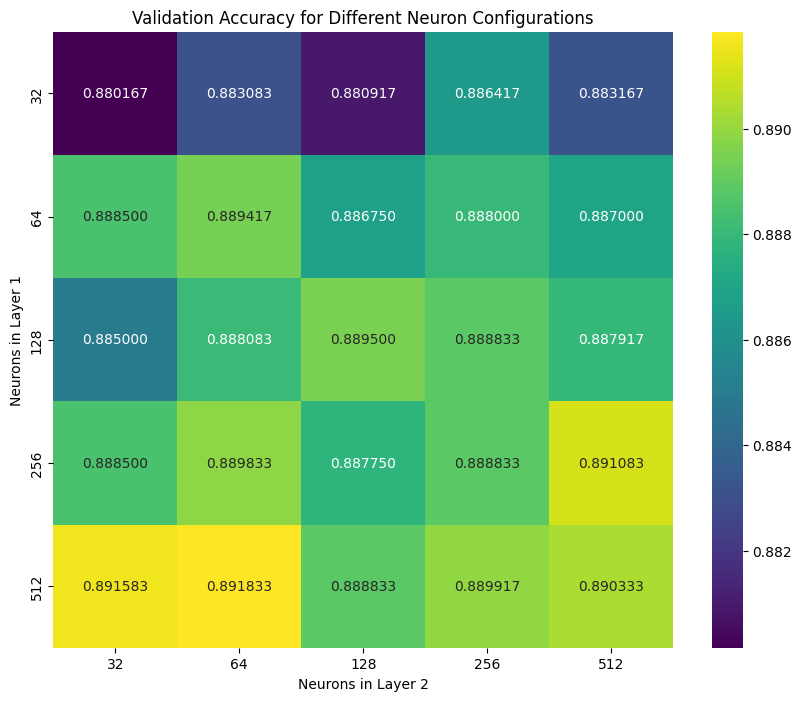

In [ ]:
# Create the heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(accuracy_matrix,
    annot=True,
    fmt=".6f",
    xticklabels=mlp_layer_sizes,
    yticklabels=mlp_layer_sizes,
    cmap="viridis"
)

plt.title("Validation Accuracy for Different Neuron Configurations")
plt.xlabel("Neurons in Layer 2")
plt.ylabel("Neurons in Layer 1")
plt.show()

## Convolutional Neural Network (CNN)
Two-Layer-Convolutional Model

In [ ]:
def build_cnn_model(filters1, kernel_size1, filters2, kernel_size2, stride1=2, stride2=2):
    model = Sequential([
        Conv2D(filters1, kernel_size1, strides=stride1, activation='relu', input_shape=(28, 28, 1)),
        Conv2D(filters2, kernel_size2, strides=stride2, activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Initialize an empty list to store the results
cnn_results = []

# Define ranges for hyperparameters
kernel_sizes = [(3, 3), (5, 5)]
filter_sizes = [32, 64, 128]

# Grid search
best_cnn_model = None
best_cnn_accuracy = 0
for filters1 in filter_sizes:
    for kernel_size1 in kernel_sizes:
        for filters2 in filter_sizes:
            for kernel_size2 in kernel_sizes:
                cnn_model = build_cnn_model(filters1, kernel_size1, filters2, kernel_size2)
                cnn_history = compile_and_train(cnn_model, x_train, y_train, x_val, y_val)
                cnn_results.append((filters1, kernel_size1, filters2, kernel_size2, max(cnn_history.history['val_accuracy'])))

                if max(cnn_history.history['val_accuracy']) > best_cnn_accuracy:
                    best_cnn_model = max(cnn_history.history['val_accuracy'])
                    best_cnn_model = cnn_model

Epoch 1/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.4844 - accuracy: 0.8268 - val_loss: 0.3693 - val_accuracy: 0.8655
Epoch 2/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3288 - accuracy: 0.8806 - val_loss: 0.3105 - val_accuracy: 0.8878
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2773 - accuracy: 0.8973 - val_loss: 0.2830 - val_accuracy: 0.8960
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2439 - accuracy: 0.9099 - val_loss: 0.2794 - val_accuracy: 0.8970
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.2139 - accuracy: 0.9199 - val_loss: 0.2703 - val_accuracy: 0.9034
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1915 - accuracy: 0.9280 - val_loss: 0.2699 - val_accuracy: 0.9029
Epoch 7/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.1687 - accuracy: 0.9366 - val_loss: 0.2593 -

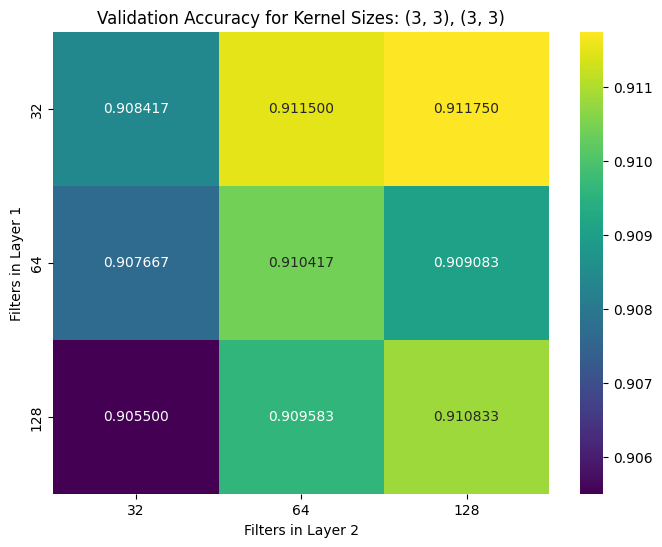

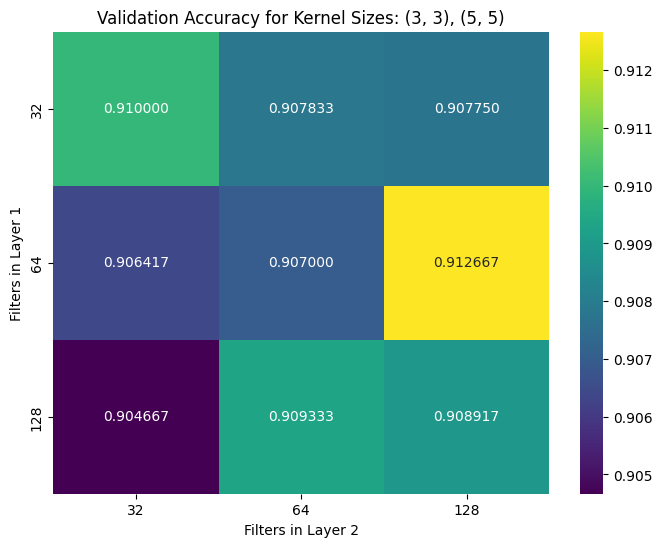

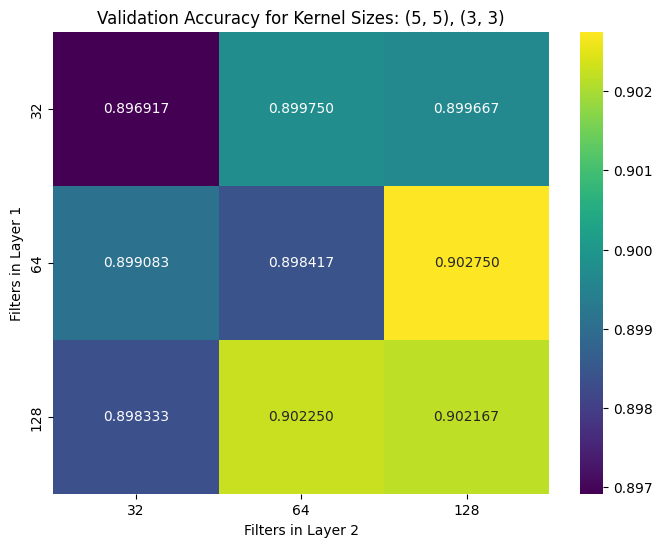

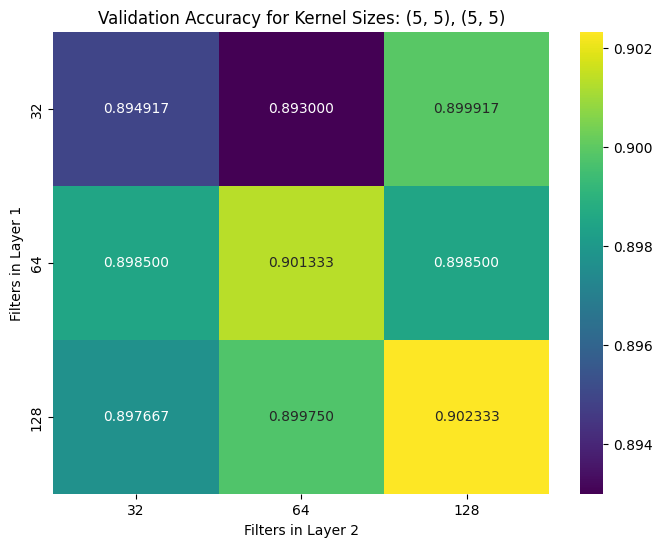

In [ ]:
# Create a heatmap for each combination of kernel sizes
for kernel_size1 in kernel_sizes:
    for kernel_size2 in kernel_sizes:
        heatmap_data = np.zeros((len(filter_sizes), len(filter_sizes)))
        for filters1, k_size1, filters2, k_size2, accuracy in cnn_results:
            if k_size1 == kernel_size1 and k_size2 == kernel_size2:
                i = filter_sizes.index(filters1)
                j = filter_sizes.index(filters2)
                heatmap_data[i, j] = accuracy

        plt.figure(figsize=(8, 6))
        sns.heatmap(heatmap_data, annot=True, fmt=".6f", xticklabels=filter_sizes, yticklabels=filter_sizes, cmap="viridis")
        plt.title(f"Validation Accuracy for Kernel Sizes: {kernel_size1}, {kernel_size2}")
        plt.xlabel("Filters in Layer 2")
        plt.ylabel("Filters in Layer 1")
        plt.show()

### Additional Max Pooling Implementation

In [ ]:
def build_cnn_maxpool_model(filters1, kernel_size1, filters2, kernel_size2, pool_size):
    model = Sequential([
        Conv2D(filters1, kernel_size1, activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size, pool_size),
        Conv2D(filters2, kernel_size2, activation='relu'),
        MaxPooling2D(pool_size, pool_size),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    return model

In [ ]:
# Initialize an empty list to store the results
maxpool_results = []

# Define ranges for hyperparameters
kernel_sizes = [(3, 3), (5, 5)]
filter_sizes = [32, 64]
pool_sizes = [2, 3]

best_maxpool_model = None
best_maxpool_accuracy = 0

# Grid search
for filters1 in filter_sizes:
    for kernel_size1 in kernel_sizes:
        for filters2 in filter_sizes:
            for kernel_size2 in kernel_sizes:
                for pool_size in pool_sizes:
                    maxpool_model = build_cnn_maxpool_model(filters1, kernel_size1, filters2, kernel_size2, pool_size)
                    maxpool_history = compile_and_train(maxpool_model, x_train, y_train, x_val, y_val)
                    maxpool_results.append((filters1, kernel_size1, filters2, kernel_size2, pool_size, max(maxpool_history.history['val_accuracy'])))
                    if max(maxpool_history.history['val_accuracy']) > best_maxpool_accuracy:
                        best_maxpool_accuracy = max(maxpool_history.history['val_accuracy'])
                        best_maxpool_model = maxpool_model

Epoch 1/10
1500/1500 [==============================] - 40s 26ms/step - loss: 0.4942 - accuracy: 0.8210 - val_loss: 0.3743 - val_accuracy: 0.8615
Epoch 2/10
1500/1500 [==============================] - 40s 27ms/step - loss: 0.3268 - accuracy: 0.8799 - val_loss: 0.3176 - val_accuracy: 0.8825
Epoch 3/10
1500/1500 [==============================] - 41s 27ms/step - loss: 0.2849 - accuracy: 0.8952 - val_loss: 0.2774 - val_accuracy: 0.8984
Epoch 4/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2552 - accuracy: 0.9059 - val_loss: 0.2715 - val_accuracy: 0.8997
Epoch 5/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.2303 - accuracy: 0.9145 - val_loss: 0.2761 - val_accuracy: 0.8979
Epoch 6/10
1500/1500 [==============================] - 37s 25ms/step - loss: 0.2095 - accuracy: 0.9218 - val_loss: 0.2644 - val_accuracy: 0.9064
Epoch 7/10
1500/1500 [==============================] - 39s 26ms/step - loss: 0.1942 - accuracy: 0.9276 - val_loss: 0.2449 -

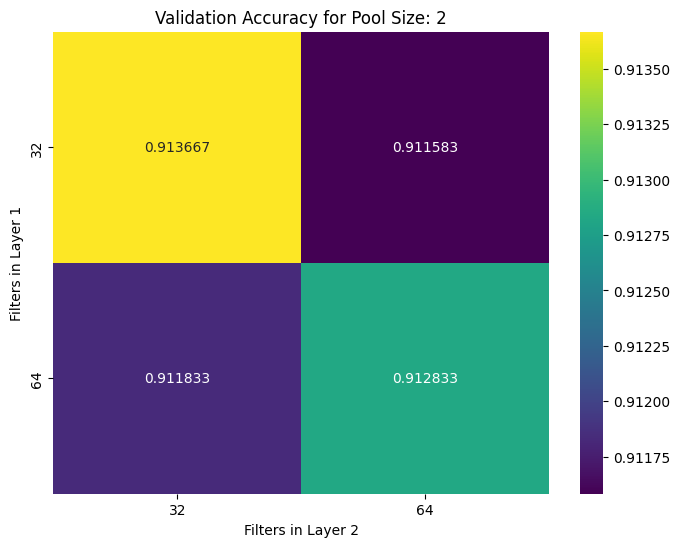

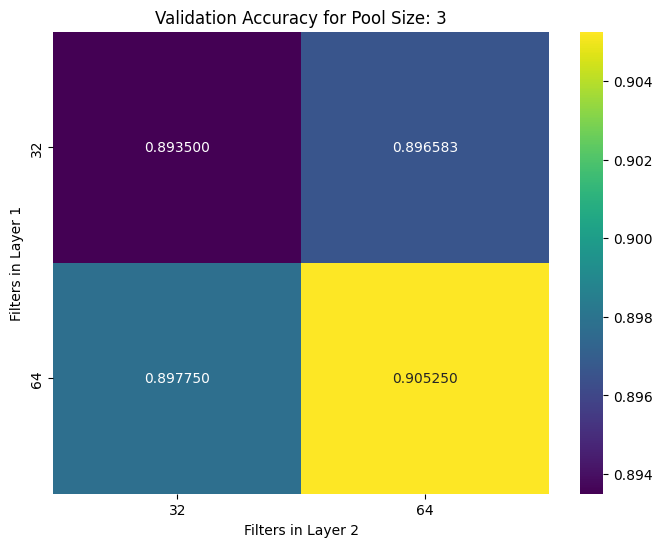

In [ ]:
# Create a heatmap for each pooling size
for pool_size in pool_sizes:
    heatmap_data = np.zeros((len(filter_sizes), len(filter_sizes)))
    for filters1, kernel_size1, filters2, kernel_size2, p_size, accuracy in maxpool_results:
        if p_size == pool_size:
            i = filter_sizes.index(filters1)
            j = filter_sizes.index(filters2)
            heatmap_data[i, j] = accuracy

    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".6f", xticklabels=filter_sizes, yticklabels=filter_sizes, cmap="viridis")
    plt.title(f"Validation Accuracy for Pool Size: {pool_size}")
    plt.xlabel("Filters in Layer 2")
    plt.ylabel("Filters in Layer 1")
    plt.show()

## Discussion

1. **One-layer Feedforward Network (Varying Neurons & Activation Functions)**:
    - Generally simpler models need to perform more on complex tasks like image classification compared to deeper architectures.
    - Activation function (ReLU, Leaky ReLU, etc.) can impact performance, typically with ReLU or its variants performing well.
    - Training time is usually shorter due to simpler architecture.

2. **Two-layer Dense Model**:
    - More capable than a single-layer network due to the added complexity &amp; ability to capture more intricate patterns.
    - Training time increases with the added complexity but is usually manageable.
    - Might start to show signs of overfitting, especially with many neurons.

3. **Two-layer Convolutional Model (Without MaxPooling)**:
    - Convolutional layers are better suited for image data, capturing spatial hierarchies.
    - Omitting MaxPooling could lead to a more significant number of parameters &amp; a longer training time.
    - It could lead to overfitting if not regularized properly.

4. **Two-layer Convolutional Model (With MaxPooling)**:
    - MaxPooling helps reduce dimensionality, making the network computationally more efficient &amp; less prone to overfitting.
    - Typically, these models balance performance &amp; computational efficiency well.
    - Often the go-to choice for image classification tasks.

### Comparing the Approaches:

- **Computational Efficiency**: MaxPooling generally improves computational efficiency by reducing the number of parameters.
- **Overfitting Risk**: Dense models with many neurons &amp; convolutional models without MaxPooling are more susceptible to overfitting.
- **Best Performance**: The convolutional models (especially with MaxPooling) often yield better performance on image datasets due to their ability to capture spatial features.

### Architectural Improvements:

- **Adding Dropout Layers**: To prevent overfitting.
- **Batch Normalization**: Can improve training stability &amp; performance.
- **Increasing Depth**: Adding more layers can help, but with diminishing returns &amp; increased risk of overfitting.

### Training Time:

- **Shortest Training Time**: Likely the one-layer feedforward network due to its simplicity.
- **Best Trade-off**: A well-designed MaxPooling convolutional model could offer best balance between accuracy &amp; computational demand.

# Applied Problem 2

## Importing Libraries

### Installing `ucimlrepo` library

In [ ]:
!pip install ucimlrepo

### Calling Modules

In [ ]:
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from ucimlrepo import fetch_ucirepo

## Data Handling

In [ ]:
# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
X = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Identifying numerical and categorical columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

# Creating a preprocessing pipeline
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Preprocessing the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

## Loss Functions

In [ ]:
# Decision Tree with Gini index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
dt_gini.fit(X_train, y_train)

# Decision Tree with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt_entropy.fit(X_train, y_train)

# Random Forest with Gini index
rf_gini = RandomForestClassifier(criterion='gini', random_state=0)
rf_gini.fit(X_train, y_train)

# Random Forest with Entropy
rf_entropy = RandomForestClassifier(criterion='entropy', random_state=0)
rf_entropy.fit(X_train, y_train)

# Bagging with Decision Tree (Gini index)
bagging_gini = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini'), random_state=0)
bagging_gini.fit(X_train, y_train)

# Bagging with Decision Tree (Entropy)
bagging_entropy = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'), random_state=0)
bagging_entropy.fit(X_train, y_train)

<ipython-input-4-5d1d42ca6d77>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_gini.fit(X_train, y_train)
<ipython-input-4-5d1d42ca6d77>:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_entropy.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A c

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy'),
                  random_state=0)

In [ ]:
models = [dt_gini, dt_entropy, rf_gini, rf_entropy, bagging_gini, bagging_entropy]
model_names = ['DT Gini', 'DT Entropy', 'RF Gini', 'RF Entropy', 'Bagging Gini', 'Bagging Entropy']

# Evaluating accuracy
for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy of {name}: {accuracy:.2f}')

Accuracy of DT Gini: 0.47
Accuracy of DT Entropy: 0.47
Accuracy of RF Gini: 0.54
Accuracy of RF Entropy: 0.54
Accuracy of Bagging Gini: 0.52
Accuracy of Bagging Entropy: 0.53


In [ ]:
# Function to calculate OOB error
def get_oob_error(model, X_train, y_train, n_estimators):
    oob_errors = []
    for n in n_estimators:
        model.set_params(n_estimators=n, oob_score=True)
        model.fit(X_train, y_train)
        oob_error = 1 - model.oob_score_
        oob_errors.append(oob_error)
    return oob_errors

<ipython-input-6-4c05ab75ad5c>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-6-4c05ab75ad5c>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
<ipython-input-6-4c05ab75ad5c>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the sh

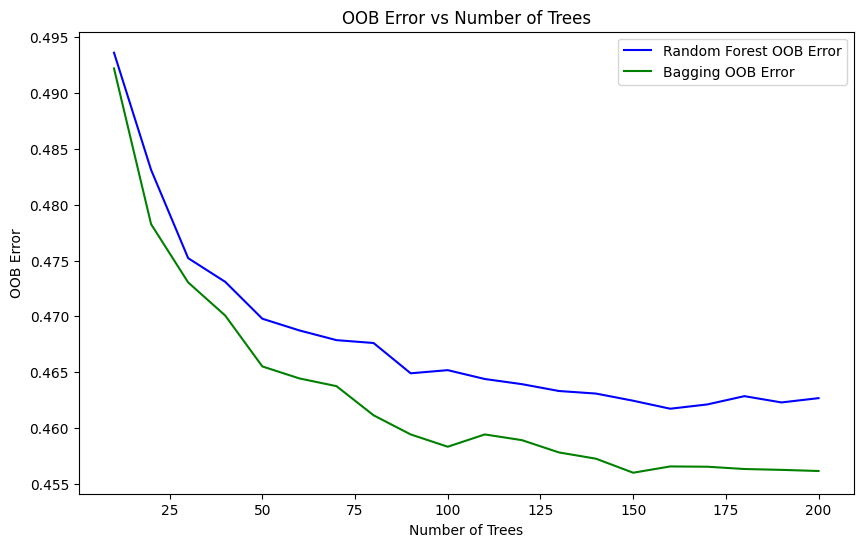

In [ ]:
n_estimators_range = range(10, 210, 10)

rf_oob_errors = get_oob_error(RandomForestClassifier(oob_score=True, random_state=0), X_train, y_train, n_estimators_range)

bagging_oob_errors = get_oob_error(BaggingClassifier(base_estimator=DecisionTreeClassifier(), oob_score=True, random_state=0), X_train, y_train, n_estimators_range)

plt.figure(figsize=(10, 6))

plt.plot(n_estimators_range, rf_oob_errors, label='Random Forest OOB Error', color='blue')
plt.plot(n_estimators_range, bagging_oob_errors, label='Bagging OOB Error', color='green')

plt.legend()
plt.xlabel('Number of Trees')
plt.ylabel('OOB Error')
plt.title('OOB Error vs Number of Trees')

plt.show()

## Overfitting Attempts (Hyperparameter Damaging)

### Decision Tree Implementation

In [ ]:
# Train an overfitted decision tree
dt_overfit = DecisionTreeClassifier(max_depth=None)  # No limit on depth
dt_overfit.fit(X_train, y_train)

# Evaluate on training and test data
train_accuracy = accuracy_score(y_train, dt_overfit.predict(X_train))
test_accuracy = accuracy_score(y_test, dt_overfit.predict(X_test))

print("Decision Tree - Train Accuracy:", train_accuracy)
print("Decision Tree - Test Accuracy:", test_accuracy)

Decision Tree - Train Accuracy: 0.9996161031914621
Decision Tree - Test Accuracy: 0.46790869075647457


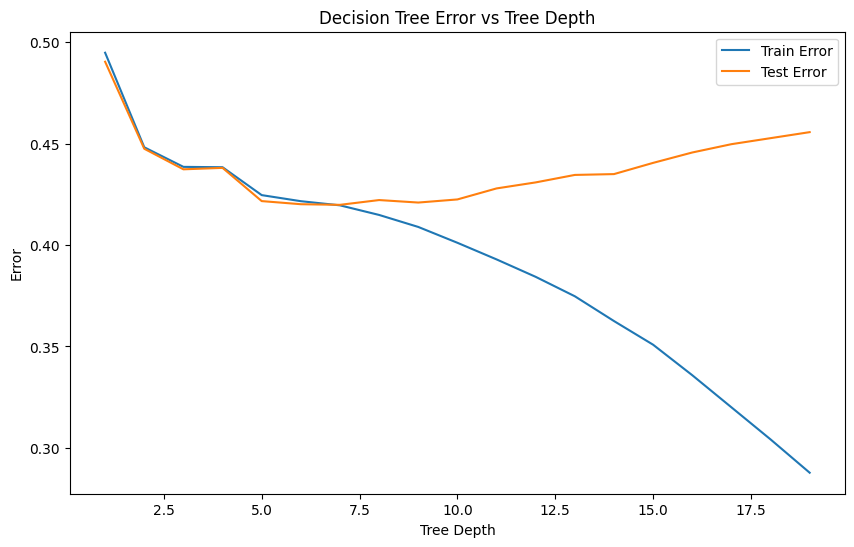

In [ ]:
max_depths = range(1, 20)
train_errors = []
test_errors = []

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, model.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, model.predict(X_test)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_errors, label='Train Error')
plt.plot(max_depths, test_errors, label='Test Error')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.title('Decision Tree Error vs Tree Depth')
plt.legend()
plt.show()

### Bagging Classifier Implementation

In [ ]:
# Using a deep decision tree as the base estimator
bagging_overfit = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=None), n_estimators=10)
bagging_overfit.fit(X_train, y_train)

# Evaluating accuracy
train_accuracy = accuracy_score(y_train, bagging_overfit.predict(X_train))
test_accuracy = accuracy_score(y_test, bagging_overfit.predict(X_test))

print("Bagging - Train Accuracy:", train_accuracy)
print("Bagging - Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging - Train Accuracy: 0.9738182376577176
Bagging - Test Accuracy: 0.53280786160303


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarnin

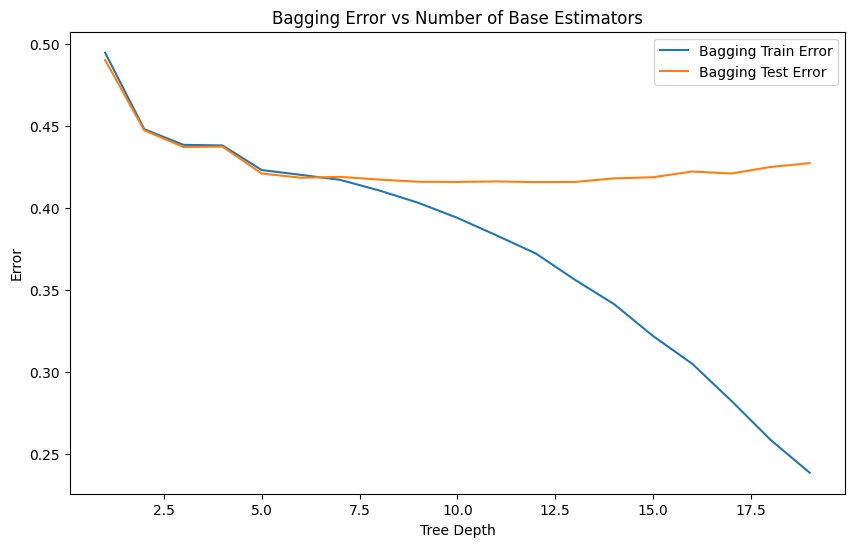

In [ ]:
n_estimators_range = range(1, 101, 20)
max_depths = range(1, 20)
bagging_train_errors = []
bagging_test_errors = []

for max_depth in max_depths:
# for n_estimators in n_estimators_range:
    bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=max_depth), n_estimators=100)
    bagging_model.fit(X_train, y_train)
    bagging_train_errors.append(1 - accuracy_score(y_train, bagging_model.predict(X_train)))
    bagging_test_errors.append(1 - accuracy_score(y_test, bagging_model.predict(X_test)))

# Plotting for Bagging
plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_range, bagging_train_errors, label='Bagging Train Error')
# plt.plot(n_estimators_range, bagging_test_errors, label='Bagging Test Error')
plt.plot(max_depths, bagging_train_errors, label='Bagging Train Error')
plt.plot(max_depths, bagging_test_errors, label='Bagging Test Error')
# plt.xlabel('Number of Base Estimators')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
plt.title('Bagging Error vs Tree Depth')
# plt.title('Bagging Error vs Number of Base Estimators')
plt.legend()
plt.show()


### AdaBoost Implementation

In [ ]:
# Overfitting AdaBoost
# adaboost_overfit = AdaBoostClassifier(n_estimators=500, learning_rate=1.5)
adaboost_overfit = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=10),  # Deeper trees
    n_estimators=500,  # More estimators
    learning_rate=1.5  # Higher learning rate
)
adaboost_overfit.fit(X_train, y_train)

# Evaluating accuracy
train_accuracy = accuracy_score(y_train, adaboost_overfit.predict(X_train))
test_accuracy = accuracy_score(y_test, adaboost_overfit.predict(X_test))

print("AdaBoost - Train Accuracy:", train_accuracy)
print("AdaBoost - Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost - Train Accuracy: 0.9566964399969288
AdaBoost - Test Accuracy: 0.5442726993551029


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

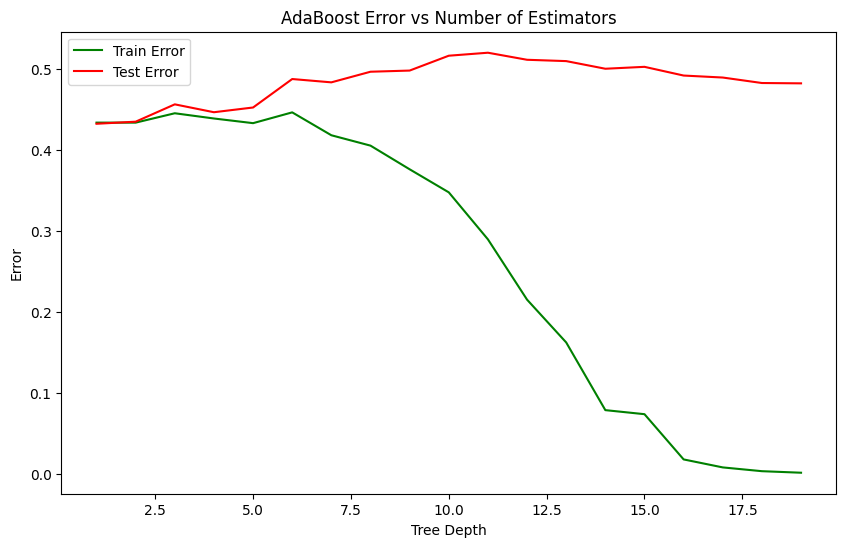

In [ ]:
n_estimators_range = range(1, 401, 20)
max_depths = range(1, 20)
adaboost_train_errors = []
adaboost_test_errors = []

for max_depth in max_depths:
# for n_estimators in n_estimators_range:
    # model = AdaBoostClassifier(n_estimators=n_estimators, random_state=0)
    model = AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=max_depth),
        n_estimators=20,
        learning_rate=1.5
    )
    model.fit(X_train, y_train)
    adaboost_train_errors.append(1 - accuracy_score(y_train, model.predict(X_train)))
    adaboost_test_errors.append(1 - accuracy_score(y_test, model.predict(X_test)))

# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_range, adaboost_train_errors, label='Train Error', color='green')
# plt.plot(n_estimators_range, adaboost_test_errors, label='Test Error', color='red')
plt.plot(max_depths, adaboost_train_errors, label='Train Error', color='green')
plt.plot(max_depths, adaboost_test_errors, label='Test Error', color='red')
# plt.xlabel('Number of Estimators')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
# plt.title('AdaBoost Error vs Number of Estimators')
plt.title('AdaBoost Error vs Tree Depth')
plt.legend()
plt.show()

### Gradient Boosting Implementation

In [ ]:
# Overfitting Gradient Boosting
# gboost_overfit = GradientBoostingClassifier(n_estimators=100, learning_rate=0.5)
gboost_overfit = GradientBoostingClassifier(
    n_estimators=500,  # More estimators
    learning_rate=0.5,  # Higher learning rate
    max_depth=10,  # Deeper trees
    subsample=0.8  # Subsampling
)
gboost_overfit.fit(X_train, y_train)

# Evaluating accuracy
train_accuracy = accuracy_score(y_train, gboost_overfit.predict(X_train))
test_accuracy = accuracy_score(y_test, gboost_overfit.predict(X_test))

print("Gradient Boosting - Train Accuracy:", train_accuracy)
print("Gradient Boosting - Test Accuracy:", test_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient Boosting - Train Accuracy: 0.954034755457733
Gradient Boosting - Test Accuracy: 0.5016890162759751


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

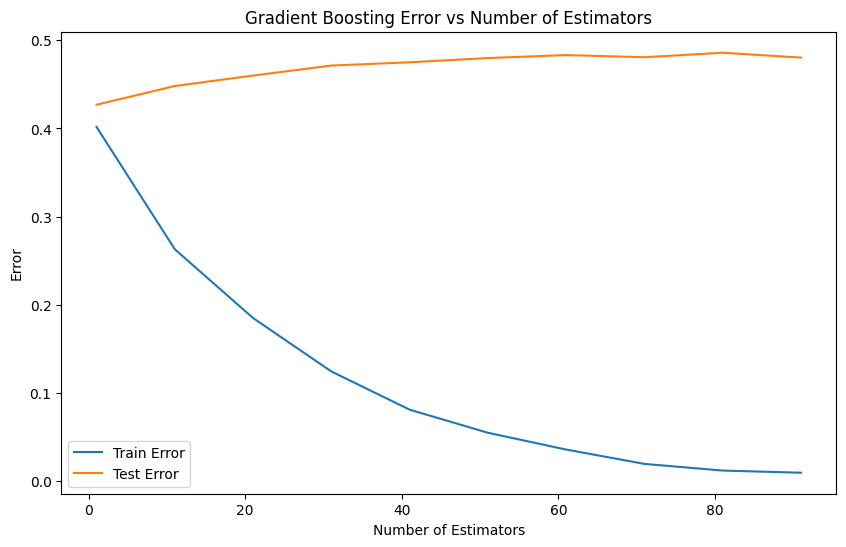

In [ ]:
n_estimators_range = range(1, 100, 10)
train_errors = []
test_errors = []

for n_estimators in n_estimators_range:
    # model = GradientBoostingClassifier(n_estimators=n_estimators)
    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        learning_rate=0.5,
        max_depth=10,
        subsample=0.8
    )
    model.fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, model.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, model.predict(X_test)))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label='Train Error')
plt.plot(n_estimators_range, test_errors, label='Test Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.title('Gradient Boosting Error vs Number of Estimators')
plt.legend()
plt.show()

### Random Forests Implementation

In [ ]:
# Overfitting Random Forests
rf_overfit = RandomForestClassifier(n_estimators=100, max_features='auto', max_depth=None)
rf_overfit.fit(X_train, y_train)

# Evaluating accuracy
train_accuracy = accuracy_score(y_train, rf_overfit.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_overfit.predict(X_test))

print("Random Forests - Train Accuracy:", train_accuracy)
print("Random Forests - Test Accuracy:", test_accuracy)

<ipython-input-9-abfedad98c2f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_overfit.fit(X_train, y_train)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forests - Train Accuracy: 0.9996161031914621
Random Forests - Test Accuracy: 0.5354693417954755


<ipython-input-5-7c7836f45b9d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-5-7c7836f45b9d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-5-7c7836f45b9d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-5-7c7836f45b9d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)
<ipython-input-5-7c7836f45b9d>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Ple

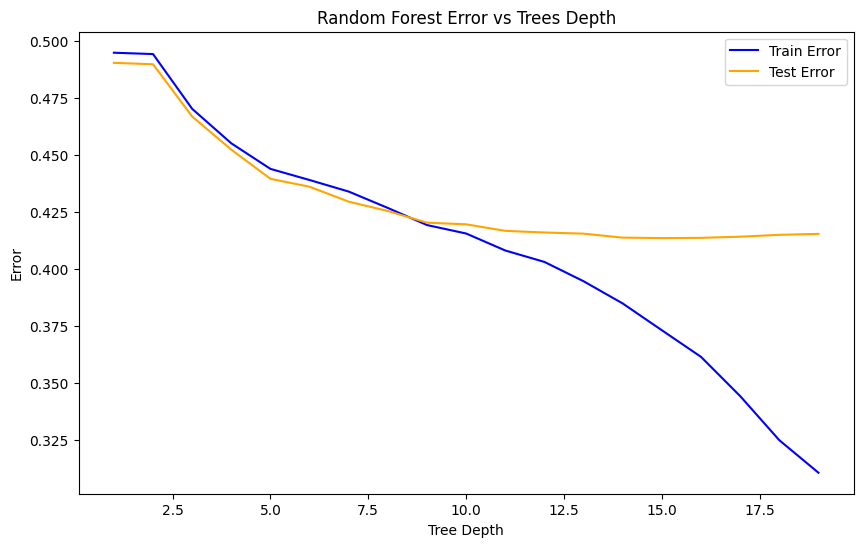

In [ ]:
# Varying the number of trees
n_estimators_range = range(1, 101, 10)
max_depths = range(1, 20)
rf_train_errors = []
rf_test_errors = []

for max_depth in max_depths:
# for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=100, max_depth=max_depth, random_state=0)
    model.fit(X_train, y_train)
    rf_train_errors.append(1 - accuracy_score(y_train, model.predict(X_train)))
    rf_test_errors.append(1 - accuracy_score(y_test, model.predict(X_test)))

# Plotting
plt.figure(figsize=(10, 6))
# plt.plot(n_estimators_range, rf_train_errors, label='Train Error', color='blue')
# plt.plot(n_estimators_range, rf_test_errors, label='Test Error', color='orange')
plt.plot(max_depths, rf_train_errors, label='Train Error', color='blue')
plt.plot(max_depths, rf_test_errors, label='Test Error', color='orange')
# plt.xlabel('Number of Trees')
plt.xlabel('Tree Depth')
plt.ylabel('Error')
# plt.title('Random Forest Error vs Number of Trees')
plt.title('Random Forest Error vs Trees Depth')
plt.legend()
plt.show()

## Hyperparameter Tuning

### Decision Tree Tuning

In [ ]:
# Define the parameter grid
param_grid_dt = {
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
# dt = DecisionTreeClassifier(random_state=0)
dt_grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid_dt,
    cv=5,
    scoring='accuracy'
)
dt_grid_search.fit(X_train, y_train)

best_dt = dt_grid_search.best_estimator_

In [ ]:
best_dt

DecisionTreeClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=0)

### Bagging Classification Tuning

In [ ]:
param_grid_bagging = {
    'base_estimator__max_depth': [3, 5, 10, 20, None],
    'n_estimators': [10, 50, 100],
    # 'max_samples': [0.5, 1.0],
    # 'max_features': [0.5, 1.0]
}
# bagging = BaggingClassifier(random_state=0)
# bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier())
bagging_grid_search = GridSearchCV(
    BaggingClassifier(base_estimator=DecisionTreeClassifier()),
    param_grid_bagging,
    cv=5,
    scoring='accuracy'
)
bagging_grid_search.fit(X_train, y_train)

best_bagging = bagging_grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_bagging.py:802: DataConversionWarnin

In [ ]:
best_bagging

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  n_estimators=100)

### AdaBoost Tuning

In [ ]:
param_grid_ada = {
    'base_estimator__max_depth': [3, 5, 10, 20, None],
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 1.0]
}

# adaboost = AdaBoostClassifier(random_state=0)
adaboost_grid_search = GridSearchCV(
    AdaBoostClassifier(base_estimator=DecisionTreeClassifier()),
    param_grid_ada,
    cv=5,
    scoring='accuracy'
)
adaboost_grid_search.fit(X_train, y_train)

best_adaboost = adaboost_grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarnin

In [ ]:
best_adaboost

### Gradient Boosting Tuning

In [ ]:
param_grid_gb = {
    'base_estimator__max_depth': [3, 5, 10, 20, None],
    'n_estimators': [50, 100, 200, 400],
    'learning_rate': [0.01, 0.1, 1,0]
}

# gb = GradientBoostingClassifier(random_state=0)
gb_grid_search = GridSearchCV(
    GradientBoostingClassifier(),
    param_grid_gb,
    cv=5,
    scoring='accuracy'
)
gb_grid_search.fit(X_train, y_train)

best_gboost = gb_grid_search.best_estimator_

In [ ]:
best_gboost

### Random Forests Tuning

In [ ]:
param_grid_rf = {
    # 'max_features': ['auto', 'sqrt']
    'max_depth': [3, 5, 10, 20, None],
    'n_estimators': [100, 200, 300],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# rf = RandomForestClassifier(random_state=0)
rf_grid_search = GridSearchCV(
    RandomForestClassifier(),
    param_grid_rf,
    cv=5,
    scoring='accuracy'
)
rf_grid_search.fit(X_train, y_train)

best_rf = rf_grid_search.best_estimator_

In [ ]:
best_rf

## Tuning Results, Discussion, &amp; Interpretations

In [ ]:
import pandas as pd

# Assuming you have the best models from GridSearchCV
best_models = {
    'DecisionTree': best_dt,  # best model from DecisionTree GridSearchCV
    'Bagging': best_bagging,  # best model from BaggingClassifier GridSearchCV
    'RandomForest': best_rf,  # best model from RandomForest GridSearchCV
    'AdaBoost': best_adaboost,  # best model from AdaBoost GridSearchCV
    'GradientBoosting': best_gboost,  # best model from GradientBoosting GridSearchCV
    # ... Add other models if you have them
}

# Dictionary to store accuracies
accuracies = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': []
}

# Iterating through each model and calculating accuracies
for model_name, model in best_models.items():
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    accuracies['Model'].append(model_name)
    accuracies['Train Accuracy'].append(train_accuracy)
    accuracies['Test Accuracy'].append(test_accuracy)

# Converting the accuracies to a DataFrame for better visualization
accuracy_df = pd.DataFrame(accuracies)
accuracy_df
